In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Establecer los datos sobre la malla
M=100 #Tamaño en x
N=100 #Tamaño en y
dx=1 #paso
a=N #borde en x
b=M #borde en y
x=np.linspace(0,a,N) #valores en x
y=np.linspace(0,b,M) #valores en y
#establecer condiciones de frontera
Vx_min=0 #valor en x=0
Vx_max=0 #valor en x=a
Vy_min=-10 #valor en y=0
Vy_max=10 #valor en y=b
def test(x,y,a,b,v_0): #recibe los valores de x, y, a, b y v_0
    x1,y1=np.meshgrid(x,y) #genera la malla para poder graficar
    V_sum=0 
    for n in range(1,160,2):  #la sumatoria de la solución analítica que recorre todos los valore de x y y
                D=((np.cosh((n*np.pi*b)/a))/(np.sinh((n*np.pi*b)/a)))+(1/(np.sinh((n*np.pi*b)/a)))
                V_sum += ((np.sin((n*np.pi*x1)/a))/n)*(D*np.sinh((n*np.pi*y1)/a)-np.cosh((n*np.pi*y1)/a))
        
    V=(4*v_0/np.pi)*V_sum #El potencial en un meshgrid

    #grafico 2D y 3D de la solución
    fig = plt.figure()
    plt.suptitle("Solución analítica")
    ax = fig.add_subplot(1,2,1,projection='3d')
    surf=ax.plot_surface(x1,y1,V,cmap=plt.cm.plasma)
    fig.colorbar(surf)
    ax1=fig.add_subplot(1,2,2)
    cont=ax1.contourf(x1, y1, V, 100, cmap=plt.cm.plasma)
    fig.colorbar(cont)
    fig.tight_layout()
    plt.show()
    return V #la función grafica y devuelve V
def error(V,V1):
    x1,y1=np.meshgrid(x,y)
    error=np.abs(V1-V) #encuentra el error con valor absoluto
    #al usar la función se grafica en 2D y 3D el error
    fig=plt.figure()
    ax = fig.add_subplot(1,2,1,projection="3d")
    fig.suptitle("Error")
    surf=ax.plot_surface(x1,y1,error,cmap=plt.cm.plasma)
    fig.colorbar(surf)
    ax1=fig.add_subplot(1,2,2)
    cont=ax1.contourf(x,y,error,100,cmap=plt.cm.plasma)
    fig.colorbar(cont)
    fig.tight_layout()
    plt.show()

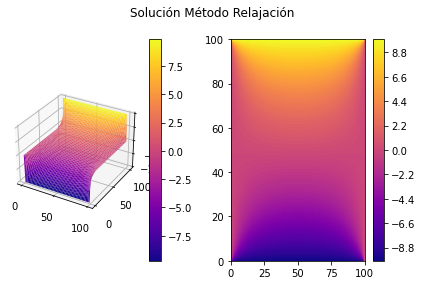

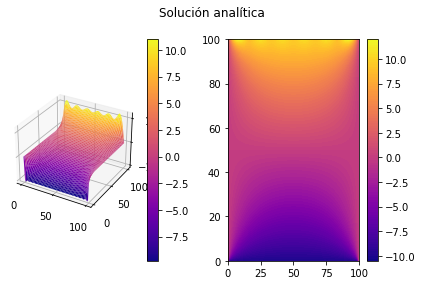

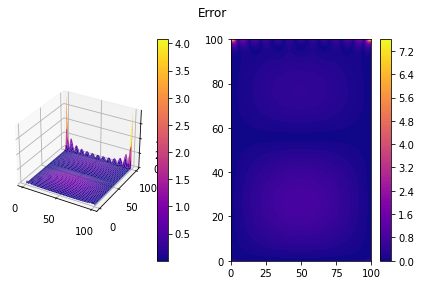

In [27]:
def solucion(M,N,Vx_min,Vx_max,Vy_min,Vy_max,x,y,a,b,dx):
    x1,y1=np.meshgrid(x,y)
    V=np.zeros((len(x),len(y))) #se genera una matriz de tamaño x,y
    V.fill(0.5) #se llena con un valor aleatorio para comenzar a hacer los calculos
    V[(N-1):, :] = Vy_max #se les asigna un valor a los valores donde x=a
    V[:1, :] = Vy_min #se les asigna un valor a los valores donde x=0
    V[:, (M-1):] = Vx_max #se les asigna un valor a los valores donde y=b
    V[:, :1] = Vx_min #se les asigna un valor a los valores donde y=0
    for n in range(0,900): #cantidad de iteraciones
        for i in range(1,len(x)-1,dx): #recorrido de x
            for j in range(1,len(y)-1,dx): #recorrido de y
                V[i,j]=(1/4)*((V[i+1][j] + V[i-1][j] + V[i][j+1] + V[i][j-1]))  
    #grafica en 2D y 3D
    fig = plt.figure()
    plt.suptitle("Solución Método Relajación")
    ax = fig.add_subplot(1,2,1,projection='3d')
    surf=ax.plot_surface(x1,y1,V,cmap=plt.cm.plasma)
    fig.colorbar(surf)
    ax1=fig.add_subplot(1,2,2)
    cont=ax1.contourf(x, y, V, 100, cmap=plt.cm.plasma)
    fig.colorbar(cont)
    fig.tight_layout()
    plt.show()
    V1=test(x,y,a,b,Vy_max) #se llama a la función para la analítica
    error(V,V1) #se llama la función para el error
solucion(M,N,Vx_min,Vx_max,Vy_min,Vy_max,x,y,a,b,dx)